In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time
pd.set_option("display.max_columns", None)

In [3]:
path = "complete_dataset_15subwindows_10slices.csv"
data = pd.read_csv(path)
data.head(10)

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1,max_Ax_hand0,max_Ay_hand0,max_Az_hand0,max_Vx_hand0,max_Vy_hand0,max_Vz_hand0,max_Jx_hand0,max_Jy_hand0,max_Jz_hand0,mean_Ax_hand0,mean_Ay_hand0,mean_Az_hand0,mean_Vx_hand0,mean_Vy_hand0,mean_Vz_hand0,mean_Jx_hand0,mean_Jy_hand0,mean_Jz_hand0,std_Ax_hand0,std_Ay_hand0,std_Az_hand0,std_Vx_hand0,std_Vy_hand0,std_Vz_hand0,std_Jx_hand0,std_Jy_hand0,std_Jz_hand0,max_Ax_hand1,max_Ay_hand1,max_Az_hand1,max_Vx_hand1,max_Vy_hand1,max_Vz_hand1,max_Jx_hand1,max_Jy_hand1,max_Jz_hand1,mean_Ax_hand1,mean_Ay_hand1,mean_Az_hand1,mean_Vx_hand1,mean_Vy_hand1,mean_Vz_hand1,mean_Jx_hand1,mean_Jy_hand1,mean_Jz_hand1,std_Ax_hand1,std_Ay_hand1,std_Az_hand1,std_Vx_hand1,std_Vy_hand1,std_Vz_hand1,std_Jx_hand1,std_Jy_hand1,std_Jz_hand1,max_w_hand0,max_x_hand0,max_y_hand0,max_z_hand0,max_AVx_hand0,max_AVy_hand0,max_AVz_hand0,max_AAx_hand0,max_AAy_hand0,max_AAz_hand0,max_AJx_hand0,max_AJy_hand0,max_AJz_hand0,mean_w_hand0,mean_x_hand0,mean_y_hand0,mean_z_hand0,mean_AVx_hand0,mean_AVy_hand0,mean_AVz_hand0,mean_AAx_hand0,mean_AAy_hand0,mean_AAz_hand0,mean_AJx_hand0,mean_AJy_hand0,mean_AJz_hand0,std_w_hand0,std_x_hand0,std_y_hand0,std_z_hand0,std_AVx_hand0,std_AVy_hand0,std_AVz_hand0,std_AAx_hand0,std_AAy_hand0,std_AAz_hand0,std_AJx_hand0,std_AJy_hand0,std_AJz_hand0,max_w_hand1,max_x_hand1,max_y_hand1,max_z_hand1,max_AVx_hand1,max_AVy_hand1,max_AVz_hand1,max_AAx_hand1,max_AAy_hand1,max_AAz_hand1,max_AJx_hand1,max_AJy_hand1,max_AJz_hand1,mean_w_hand1,mean_x_hand1,mean_y_hand1,mean_z_hand1,mean_AVx_hand1,mean_AVy_hand1,mean_AVz_hand1,mean_AAx_hand1,mean_AAy_hand1,mean_AAz_hand1,mean_AJx_hand1,mean_AJy_hand1,mean_AJz_hand1,std_w_hand1,std_x_hand1,std_y_hand1,std_z_hand1,std_AVx_hand1,std_AVy_hand1,std_AVz_hand1,std_AAx_hand1,std_AAy_hand1,std_AAz_hand1,std_AJx_hand1,std_AJy_hand1,std_AJz_hand1
0,7,14,0,smoothness,1,3,medium,2,1,1,0.500000,0.615385,0.670391,0.495868,0.759036,0.652406,0.75625,0.666667,0.497805,0.613462,0.665764,0.492188,0.718656,0.636197,0.748926,0.660851,0.002324,0.002503,0.003077,0.002455,0.006501,0.004039,0.003061,0.002083,0.508197,0.908451,0.751445,0.730159,0.493878,0.995918,0.648515,0.576037,0.496670,0.846831,0.691595,0.636244,0.491412,0.608674,0.601382,0.558852,0.004198,0.014491,0.015432,0.026432,0.002186,0.218816,0.022186,0.006429,-0.857056,-0.084885,0.479568,0.000208,0.000215,0.000349,0.718061,0.488281,1.206342,-0.863110,-0.091721,0.468826,9.082031e-06,-0.000028,-0.000006,0.036854,0.039343,0.092439,0.006753,0.007619,0.010341,0.000193,0.000245,0.000281,0.488563,0.441082,0.750762,0.986160,0.013489,-0.211105,0.001218,0.000510,0.000937,1.448006,0.708008,2.343750,0.964774,-0.007117,-0.249875,1.117188e-04,0.000070,0.000027,-0.104780,0.096063,0.335256,0.022364,0.013963,0.028878,0.000738,0.000331,0.000943,1.260192,0.571902,1.565671,0.179352,0.484946,0.160615,-0.840857,0.009831,0.012959,0.117029,1.270143,2.238883,19.812834,154.113175,104.818227,1338.775861,0.178765,0.484513,0.160469,-0.841154,-0.016003,-0.027618,-0.081836,0.129868,0.552890,-1.016133,16.779031,-45.915024,210.907738,0.000451,0.000472,0.000210,0.000335,0.016423,0.031903,0.200440,1.160057,1.546528,13.337295,97.220032,155.178181,1114.885458,0.600343,-0.175433,-0.769104,-0.129347,0.14

In [4]:
starting_index = 10

In [5]:
print(data.property_name.unique())
print(data.property_id.unique())
print(sorted(data.clothes_id.unique()))

['smoothness' 'thickness' 'warmth' 'flexibility' 'softness' 'enjoyment']
[0 1 2 3 4 5]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36]


In [6]:
# Initialise the random state
num = 183 #
#num = random.randint(1, 500)
print(f"The generated random seed is {num}") #347

The generated random seed is 183


## Section A) Physical properties

### Observe the data

In [7]:
physical_data = data[data.property_name != 'enjoyment']
physical_data.head()

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1,max_Ax_hand0,max_Ay_hand0,max_Az_hand0,max_Vx_hand0,max_Vy_hand0,max_Vz_hand0,max_Jx_hand0,max_Jy_hand0,max_Jz_hand0,mean_Ax_hand0,mean_Ay_hand0,mean_Az_hand0,mean_Vx_hand0,mean_Vy_hand0,mean_Vz_hand0,mean_Jx_hand0,mean_Jy_hand0,mean_Jz_hand0,std_Ax_hand0,std_Ay_hand0,std_Az_hand0,std_Vx_hand0,std_Vy_hand0,std_Vz_hand0,std_Jx_hand0,std_Jy_hand0,std_Jz_hand0,max_Ax_hand1,max_Ay_hand1,max_Az_hand1,max_Vx_hand1,max_Vy_hand1,max_Vz_hand1,max_Jx_hand1,max_Jy_hand1,max_Jz_hand1,mean_Ax_hand1,mean_Ay_hand1,mean_Az_hand1,mean_Vx_hand1,mean_Vy_hand1,mean_Vz_hand1,mean_Jx_hand1,mean_Jy_hand1,mean_Jz_hand1,std_Ax_hand1,std_Ay_hand1,std_Az_hand1,std_Vx_hand1,std_Vy_hand1,std_Vz_hand1,std_Jx_hand1,std_Jy_hand1,std_Jz_hand1,max_w_hand0,max_x_hand0,max_y_hand0,max_z_hand0,max_AVx_hand0,max_AVy_hand0,max_AVz_hand0,max_AAx_hand0,max_AAy_hand0,max_AAz_hand0,max_AJx_hand0,max_AJy_hand0,max_AJz_hand0,mean_w_hand0,mean_x_hand0,mean_y_hand0,mean_z_hand0,mean_AVx_hand0,mean_AVy_hand0,mean_AVz_hand0,mean_AAx_hand0,mean_AAy_hand0,mean_AAz_hand0,mean_AJx_hand0,mean_AJy_hand0,mean_AJz_hand0,std_w_hand0,std_x_hand0,std_y_hand0,std_z_hand0,std_AVx_hand0,std_AVy_hand0,std_AVz_hand0,std_AAx_hand0,std_AAy_hand0,std_AAz_hand0,std_AJx_hand0,std_AJy_hand0,std_AJz_hand0,max_w_hand1,max_x_hand1,max_y_hand1,max_z_hand1,max_AVx_hand1,max_AVy_hand1,max_AVz_hand1,max_AAx_hand1,max_AAy_hand1,max_AAz_hand1,max_AJx_hand1,max_AJy_hand1,max_AJz_hand1,mean_w_hand1,mean_x_hand1,mean_y_hand1,mean_z_hand1,mean_AVx_hand1,mean_AVy_hand1,mean_AVz_hand1,mean_AAx_hand1,mean_AAy_hand1,mean_AAz_hand1,mean_AJx_hand1,mean_AJy_hand1,mean_AJz_hand1,std_w_hand1,std_x_hand1,std_y_hand1,std_z_hand1,std_AVx_hand1,std_AVy_hand1,std_AVz_hand1,std_AAx_hand1,std_AAy_hand1,std_AAz_hand1,std_AJx_hand1,std_AJy_hand1,std_AJz_hand1
0,7,14,0,smoothness,1,3,medium,2,1,1,0.5,0.615385,0.670391,0.495868,0.759036,0.652406,0.75625,0.666667,0.497805,0.613462,0.665764,0.492188,0.718656,0.636197,0.748926,0.660851,0.002324,0.002503,0.003077,0.002455,0.006501,0.004039,0.003061,0.002083,0.508197,0.908451,0.751445,0.730159,0.493878,0.995918,0.648515,0.576037,0.496670,0.846831,0.691595,0.636244,0.491412,0.608674,0.601382,0.558852,0.004198,0.014491,0.015432,0.026432,0.002186,0.218816,0.022186,0.006429,-0.857056,-0.084885,0.479568,0.000208,0.000215,0.000349,0.718061,0.488281,1.206342,-0.863110,-0.091721,0.468826,9.082031e-06,-0.000028,-0.000006,0.036854,0.039343,0.092439,0.006753,0.007619,0.010341,0.000193,0.000245,0.000281,0.488563,0.441082,0.750762,0.986160,0.013489,-0.211105,0.001218,0.000510,0.000937,1.448006,0.708008,2.343750,0.964774,-0.007117,-0.249875,1.117188e-04,0.000070,0.000027,-0.104780,0.096063,0.335256,0.022364,0.013963,0.028878,0.000738,0.000331,0.000943,1.260192,0.571902,1.565671,0.179352,0.484946,0.160615,-0.840857,0.009831,0.012959,0.117029,1.270143,2.238883,19.812834,154.113175,104.818227,1338.775861,0.178765,0.484513,0.160469,-0.841154,-0.016003,-0.027618,-0.081836,0.129868,0.552890,-1.016133,16.779031,-45.915024,210.907738,0.000451,0.000472,0.000210,0.000335,0.016423,0.031903,0.200440,1.160057,1.546528,13.337295,97.220032,155.178181,1114.885458,0.600343,-0.175433,-0.769104,-0.129347,0.140072,

In [8]:
emg_data = physical_data.iloc[:,:58]
emg_data.head()

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1
0,7,14,0,smoothness,1,3,medium,2,1,1,0.5,0.615385,0.670391,0.495868,0.759036,0.652406,0.75625,0.666667,0.497805,0.613462,0.665764,0.492188,0.718656,0.636197,0.748926,0.660851,0.002324,0.002503,0.003077,0.002455,0.006501,0.004039,0.003061,0.002083,0.508197,0.908451,0.751445,0.730159,0.493878,0.995918,0.648515,0.576037,0.496670,0.846831,0.691595,0.636244,0.491412,0.608674,0.601382,0.558852,0.004198,0.014491,0.015432,0.026432,0.002186,0.218816,0.022186,0.006429
1,7,14,0,smoothness,1,3,medium,2,1,2,0.5,0.615385,0.670391,0.495868,0.734940,0.641711,0.75625,0.666667,0.497331,0.612607,0.665735,0.492597,0.717746,0.635807,0.749609,0.661458,0.002484,0.002791,0.003327,0.002405,0.008698,0.005318,0.003954,0.002901,0.504098,0.929578,0.757225,0.714286,0.497959,0.734694,0.633663,0.571429,0.497375,0.849582,0.692467,0.635417,0.491965,0.503827,0.596070,0.557604,0.002954,0.013122,0.013631,0.022183,0.002619,0.111327,0.012712,0.004858
2,7,14,0,smoothness,1,3,medium,2,1,3,0.5,0.620513,0.670391,0.495868,0.740964,0.647059,0.75625,0.666667,0.497504,0.612607,0.666201,0.492511,0.718373,0.636809,0.748307,0.660995,0.002042,0.002791,0.002938,0.002199,0.007508,0.004658,0.003347,0.002685,0.500000,0.866197,0.699422,0.645503,0.493878,0.685714,0.618812,0.571429,0.497268,0.847711,0.691595,0.634039,0.491327,0.476105,0.594884,0.557988,0.003087,0.005556,0.003264,0.004274,0.001997,0.092711,0.008191,0.005364
3,7,14,0,smoothness,1,3,medium,2,1,4,0.5,0.615385,0.675978,0.495868,0.722892,0.647059,0.76250,0.666667,0.497676,0.612607,0.666201,0.492166,0.718373,0.637478,0.749349,0.660417,0.002544,0.002583,0.002703,0.002129,0.003623,0.003481,0.003469,0.003366,0.504098,0.866197,0.705202,0.650794,0.493878,0.787755,0.628713,0.576037,0.497183,0.848591,0.691835,0.633764,0.492092,0.540434,0.600093,0.559476,0.002839,0.005657,0.004265,0.006547,0.002057,0.109162,0.014100,0.006607
4,7,14,0,smoothness,1,3,medium,2,1,5,0.5,0.615385,0.670391,0.495868,0.734940,0.647059,0.76250,0.666667,0.497418,0.612286,0.665502,0.491822,0.719126,0.636810,0.748958,0.660532,0.002503,0.002747,0.002966,0.001806,0.004051,0.003087,0.004340,0.002863,0.500000,0.859155,0.693642,0.640212,0.493878,0.673469,0.608911,0.566820,0.496542,0.848371,0.691113,0.634260,0.491008,0.493941,0.594910,0.557604,0.002553,0.004341,0.002891,0.003333,0.002143,0.098174,0.009725,0.005128


In [9]:
print(physical_data.shape)
print(emg_data.shape)

(62989, 190)
(62989, 58)


<AxesSubplot:>

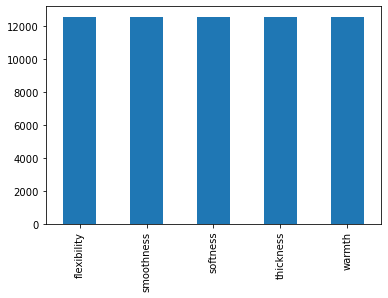

In [10]:
physical_data['property_name'].value_counts().sort_index().plot.bar()

Balanced data. Each property has approximately the same number of samples

<AxesSubplot:>

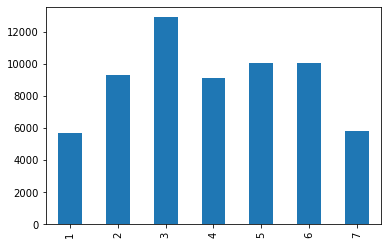

In [11]:
physical_data['rating'].value_counts().sort_index().plot.bar()

Modal answer was 6. Very few people said 1

<AxesSubplot:>

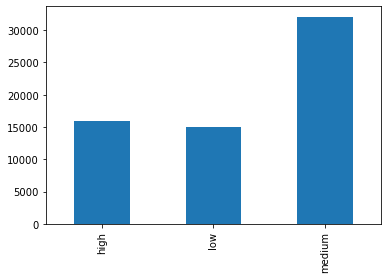

In [12]:
physical_data['rating_level'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

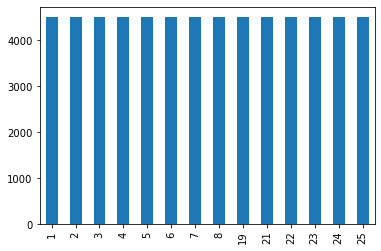

In [13]:
physical_data['participant_id'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

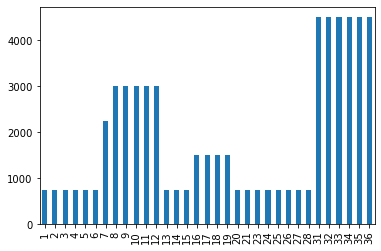

In [14]:
physical_data['clothes_id'].value_counts().sort_index().plot.bar()

Unbalanced data. More than double the number of observations for medium than low

### Task 1: Predicting the property based on the provided data (excluding enjoyment data)

#### Step 1: LOPOCV (Leave One Participant Out CV)

In [15]:
# Note: predicting_feature = 'property_id' or 'rating'

def rf_LOPOCV(data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num, starting_index=10):
    if predicting_feature == 'property_id':
        print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')
    else:
        print(f'Classification accuracy when predicting ratings at random : {round(1/len(data.rating_level_num.unique())*100,2)}% ')
    print('__________________________________________')

    if predicting_feature == 'property_id':
        macro_f1_lst = []
    elif predicting_feature == 'rating_level_num':
        weighted_f1_lst = []    
    micro_f1_lst = []
    acc_lst = []
    total_conf_mat = 0

    for participant in sorted(data.participant_id.unique()): #range(19,26):    

        # Split the data into training and testing
        training_data = data[data.participant_id != participant]
        testing_data = data[data.participant_id == participant]

        # Data preparation
        #starting_index = 11
        X_train = training_data.iloc[:,starting_index:].values        
        y_train = training_data[predicting_feature].values
        X_test = testing_data.iloc[:,starting_index:].values        
        y_test = testing_data[predicting_feature].values
        
       
        # Configure the cross-validation procedure
        cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)

        # Define the model
        rf_model = RandomForestClassifier(random_state=num)

        # Create a dictionary with the hyperparameters to tune
        features_dict = dict()
        features_dict['n_estimators'] = [100, 500, 1000, 1500]

        # Define the Grid Search
        if predicting_feature == 'property_id':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_macro', cv=cv_inner, refit=True) #accuracy
        elif predicting_feature == 'rating_level_num':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_weighted', cv=cv_inner, refit=True) #accuracy

        # Execute the search
        result = search.fit(X_train, y_train)

        # Obtain the best performing model fit on the whole training set
        best_rf_model = result.best_estimator_

        # Using the model, obtain predictions for the test data
        predictions = best_rf_model.predict(X_test)

        # Evaluate the model
        if predicting_feature == 'property_id':
            conf_mat = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3, 4])
            macro_f1_score = f1_score(y_test, predictions, average='macro') 
            macro_f1_lst.append(macro_f1_score) 
        elif predicting_feature == 'rating_level_num':
            conf_mat = confusion_matrix(y_test, predictions, labels=[1,2,3])
            weighted_f1_score = f1_score(y_test, predictions, average='weighted') 
            weighted_f1_lst.append(weighted_f1_score)
            
        total_conf_mat += conf_mat
        micro_f1_score = f1_score(y_test, predictions, average='micro')  
        micro_f1_lst.append(micro_f1_score)
        acc = accuracy_score(y_test, predictions)
        acc_lst.append(acc)

        print(f'Leaving participant {participant} out {result.best_params_}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) Micro F1 score = {round(micro_f1_score,2)}")
        if predicting_feature == 'property_id':
            print(f"(3) Macro F1 score = {round(macro_f1_score,2)}")
        elif predicting_feature == 'rating_level_num':
            print(f"(3) Weighted F1 score = {round(weighted_f1_score,2)}")            
        print(f"(4) Percentage Classification accuracy = {round(acc*100,2)}%")

        print('__________________________________________')

    avg_micro_f1_score = sum(micro_f1_lst) / len(micro_f1_lst)
    if predicting_feature == 'property_id':
        avg_macro_f1_score = sum(macro_f1_lst) / len(macro_f1_lst)
    elif predicting_feature == 'rating_level_num':
        avg_weighted_f1_score = sum(weighted_f1_lst) / len(weighted_f1_lst)               
    avg_acc = sum(acc_lst) / len(acc_lst)   
    
    print(f'Using Leave One Participant Out CV (LOPOCV):') 
    print("(1) Confusion matrix:\n", total_conf_mat)
    print(f"(2) Average micro F1 score = {round(avg_micro_f1_score,2)}")
    if predicting_feature == 'property_id':
        print(f"(3) Average macro F1 score = {round(avg_macro_f1_score,2)}")
    elif predicting_feature == 'rating_level_num':
        print(f"(3) Average weighted F1 score = {round(avg_weighted_f1_score,2)}")      
    print(f"(4) Average Percentage Classification accuracy = {round(avg_acc*100,2)}%")
          

##### Using all features (180 features)

In [16]:
t1 = time.time()
rf_LOPOCV(data=physical_data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num, starting_index=starting_index)
t2 = time.time()

Classification accuracy when predicting properties at random : 20.0% 
__________________________________________
Leaving participant 1 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[747  53   5   0  95]
 [533 173 129   0  65]
 [726   1 120   0  53]
 [345 444  12   1  98]
 [296 374 106   8 116]]
(2) Micro F1 score = 0.26
(3) Macro F1 score = 0.19
(4) Percentage Classification accuracy = 25.71%
__________________________________________
Leaving participant 2 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[166  72  60 595   7]
 [  0 631   1 215  53]
 [  0   9 891   0   0]
 [  0   1   2 893   4]
 [  0 224  10 634  32]]
(2) Micro F1 score = 0.58
(3) Macro F1 score = 0.51
(4) Percentage Classification accuracy = 58.07%
__________________________________________
Leaving participant 3 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[ 14   6  44 810  26]
 [  0 107  10 425 358]
 [  1  18   1 664 216]
 [  0  24   0 689 187]
 [ 36 167   1 488 208]]
(2) Micro F1 score = 0.23
(3) Macr

In [17]:
t2-t1

117991.6280181408

##### Using only emg features (48 features)

In [18]:
t3 = time.time()
rf_LOPOCV(data=emg_data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num, starting_index=starting_index)
t4 = time.time()

Classification accuracy when predicting properties at random : 20.0% 
__________________________________________
Leaving participant 1 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[775   3  89  12  21]
 [286  21 387  66 140]
 [875   1  20   1   3]
 [324  22  97 260 197]
 [451  14 124 146 165]]
(2) Micro F1 score = 0.28
(3) Macro F1 score = 0.22
(4) Percentage Classification accuracy = 27.58%
__________________________________________
Leaving participant 2 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[236  35 466  82  81]
 [176  21 314 245 144]
 [  9   0 891   0   0]
 [ 76   8 146 554 116]
 [121  37 272 298 172]]
(2) Micro F1 score = 0.42
(3) Macro F1 score = 0.35
(4) Percentage Classification accuracy = 41.64%
__________________________________________
Leaving participant 3 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[671   4 136  70  19]
 [136  35 193 445  91]
 [289   9 163 373  66]
 [ 78   9  83 724   6]
 [113  77 365 282  63]]
(2) Micro F1 score = 0.37
(3) Macr

In [19]:
t4-t3

44113.691594839096

rf_LOCOCV_properties(data=physical_data, num_inner_folds=3, predicting_feature = 'property_id', random_state=num) 


### Task 2: Predicting the rating of the property based on the data

#### Step 1: LOPOCV (Leave One Participant Out CV)

In [20]:
def one_hot_encode_properties(df, predicting_feature = 'property_id'):
    # Create an instance of a one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    # Perform one-hot encoding on the specified column 
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[predicting_feature]]).toarray())
    
    return encoder_df


In [21]:
# One hot encode properties and add this to physical data
properties_one_hot_encoded = one_hot_encode_properties(df=physical_data, predicting_feature = 'property_id')
print(properties_one_hot_encoded.shape, physical_data.shape)
new_physical_data = pd.concat([physical_data.reset_index(drop=True), properties_one_hot_encoded.reset_index(drop=True)], axis = 1)
print(new_physical_data.shape)
new_physical_data.head()

(62989, 5) (62989, 190)
(62989, 195)


,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1,max_Ax_hand0,max_Ay_hand0,max_Az_hand0,max_Vx_hand0,max_Vy_hand0,max_Vz_hand0,max_Jx_hand0,max_Jy_hand0,max_Jz_hand0,mean_Ax_hand0,mean_Ay_hand0,mean_Az_hand0,mean_Vx_hand0,mean_Vy_hand0,mean_Vz_hand0,mean_Jx_hand0,mean_Jy_hand0,mean_Jz_hand0,std_Ax_hand0,std_Ay_hand0,std_Az_hand0,std_Vx_hand0,std_Vy_hand0,std_Vz_hand0,std_Jx_hand0,std_Jy_hand0,std_Jz_hand0,max_Ax_hand1,max_Ay_hand1,max_Az_hand1,max_Vx_hand1,max_Vy_hand1,max_Vz_hand1,max_Jx_hand1,max_Jy_hand1,max_Jz_hand1,mean_Ax_hand1,mean_Ay_hand1,mean_Az_hand1,mean_Vx_hand1,mean_Vy_hand1,mean_Vz_hand1,mean_Jx_hand1,mean_Jy_hand1,mean_Jz_hand1,std_Ax_hand1,std_Ay_hand1,std_Az_hand1,std_Vx_hand1,std_Vy_hand1,std_Vz_hand1,std_Jx_hand1,std_Jy_hand1,std_Jz_hand1,max_w_hand0,max_x_hand0,max_y_hand0,max_z_hand0,max_AVx_hand0,max_AVy_hand0,max_AVz_hand0,max_AAx_hand0,max_AAy_hand0,max_AAz_hand0,max_AJx_hand0,max_AJy_hand0,max_AJz_hand0,mean_w_hand0,mean_x_hand0,mean_y_hand0,mean_z_hand0,mean_AVx_hand0,mean_AVy_hand0,mean_AVz_hand0,mean_AAx_hand0,mean_AAy_hand0,mean_AAz_hand0,mean_AJx_hand0,mean_AJy_hand0,mean_AJz_hand0,std_w_hand0,std_x_hand0,std_y_hand0,std_z_hand0,std_AVx_hand0,std_AVy_hand0,std_AVz_hand0,std_AAx_hand0,std_AAy_hand0,std_AAz_hand0,std_AJx_hand0,std_AJy_hand0,std_AJz_hand0,max_w_hand1,max_x_hand1,max_y_hand1,max_z_hand1,max_AVx_hand1,max_AVy_hand1,max_AVz_hand1,max_AAx_hand1,max_AAy_hand1,max_AAz_hand1,max_AJx_hand1,max_AJy_hand1,max_AJz_hand1,mean_w_hand1,mean_x_hand1,mean_y_hand1,mean_z_hand1,mean_AVx_hand1,mean_AVy_hand1,mean_AVz_hand1,mean_AAx_hand1,mean_AAy_hand1,mean_AAz_hand1,mean_AJx_hand1,mean_AJy_hand1,mean_AJz_hand1,std_w_hand1,std_x_hand1,std_y_hand1,std_z_hand1,std_AVx_hand1,std_AVy_hand1,std_AVz_hand1,std_AAx_hand1,std_AAy_hand1,std_AAz_hand1,std_AJx_hand1,std_AJy_hand1,std_AJz_hand1,0,1,2,3,4
0,7,14,0,smoothness,1,3,medium,2,1,1,0.5,0.615385,0.670391,0.495868,0.759036,0.652406,0.75625,0.666667,0.497805,0.613462,0.665764,0.492188,0.718656,0.636197,0.748926,0.660851,0.002324,0.002503,0.003077,0.002455,0.006501,0.004039,0.003061,0.002083,0.508197,0.908451,0.751445,0.730159,0.493878,0.995918,0.648515,0.576037,0.496670,0.846831,0.691595,0.636244,0.491412,0.608674,0.601382,0.558852,0.004198,0.014491,0.015432,0.026432,0.002186,0.218816,0.022186,0.006429,-0.857056,-0.084885,0.479568,0.000208,0.000215,0.000349,0.718061,0.488281,1.206342,-0.863110,-0.091721,0.468826,9.082031e-06,-0.000028,-0.000006,0.036854,0.039343,0.092439,0.006753,0.007619,0.010341,0.000193,0.000245,0.000281,0.488563,0.441082,0.750762,0.986160,0.013489,-0.211105,0.001218,0.000510,0.000937,1.448006,0.708008,2.343750,0.964774,-0.007117,-0.249875,1.117188e-04,0.000070,0.000027,-0.104780,0.096063,0.335256,0.022364,0.013963,0.028878,0.000738,0.000331,0.000943,1.260192,0.571902,1.565671,0.179352,0.484946,0.160615,-0.840857,0.009831,0.012959,0.117029,1.270143,2.238883,19.812834,154.113175,104.818227,1338.775861,0.178765,0.484513,0.160469,-0.841154,-0.016003,-0.027618,-0.081836,0.129868,0.552890,-1.016133,16.779031,-45.915024,210.907738,0.000451,0.000472,0.000210,0.000335,0.016423,0.031903,0.200440,1.160057,1.546528,13.337295,97.220032,155.178181,1114.885458,0.600343,-0.175433,-0.769104,-0.129347

In [22]:
# One hot encode properties and add this to emg data
emg_properties_one_hot_encoded = one_hot_encode_properties(df=emg_data, predicting_feature = 'property_id')
print(emg_properties_one_hot_encoded.shape, emg_data.shape)
new_emg_data = pd.concat([emg_data.reset_index(drop=True), emg_properties_one_hot_encoded.reset_index(drop=True)], axis = 1)
print(new_emg_data.shape)
new_emg_data.head()

(62989, 5) (62989, 58)
(62989, 63)


,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1,0,1,2,3,4
0,7,14,0,smoothness,1,3,medium,2,1,1,0.5,0.615385,0.670391,0.495868,0.759036,0.652406,0.75625,0.666667,0.497805,0.613462,0.665764,0.492188,0.718656,0.636197,0.748926,0.660851,0.002324,0.002503,0.003077,0.002455,0.006501,0.004039,0.003061,0.002083,0.508197,0.908451,0.751445,0.730159,0.493878,0.995918,0.648515,0.576037,0.496670,0.846831,0.691595,0.636244,0.491412,0.608674,0.601382,0.558852,0.004198,0.014491,0.015432,0.026432,0.002186,0.218816,0.022186,0.006429,1.0,0.0,0.0,0.0,0.0
1,7,14,0,smoothness,1,3,medium,2,1,2,0.5,0.615385,0.670391,0.495868,0.734940,0.641711,0.75625,0.666667,0.497331,0.612607,0.665735,0.492597,0.717746,0.635807,0.749609,0.661458,0.002484,0.002791,0.003327,0.002405,0.008698,0.005318,0.003954,0.002901,0.504098,0.929578,0.757225,0.714286,0.497959,0.734694,0.633663,0.571429,0.497375,0.849582,0.692467,0.635417,0.491965,0.503827,0.596070,0.557604,0.002954,0.013122,0.013631,0.022183,0.002619,0.111327,0.012712,0.004858,1.0,0.0,0.0,0.0,0.0
2,7,14,0,smoothness,1,3,medium,2,1,3,0.5,0.620513,0.670391,0.495868,0.740964,0.647059,0.75625,0.666667,0.497504,0.612607,0.666201,0.492511,0.718373,0.636809,0.748307,0.660995,0.002042,0.002791,0.002938,0.002199,0.007508,0.004658,0.003347,0.002685,0.500000,0.866197,0.699422,0.645503,0.493878,0.685714,0.618812,0.571429,0.497268,0.847711,0.691595,0.634039,0.491327,0.476105,0.594884,0.557988,0.003087,0.005556,0.003264,0.004274,0.001997,0.092711,0.008191,0.005364,1.0,0.0,0.0,0.0,0.0
3,7,14,0,smoothness,1,3,medium,2,1,4,0.5,0.615385,0.675978,0.495868,0.722892,0.647059,0.76250,0.666667,0.497676,0.612607,0.666201,0.492166,0.718373,0.637478,0.749349,0.660417,0.002544,0.002583,0.002703,0.002129,0.003623,0.003481,0.003469,0.003366,0.504098,0.866197,0.705202,0.650794,0.493878,0.787755,0.628713,0.576037,0.497183,0.848591,0.691835,0.633764,0.492092,0.540434,0.600093,0.559476,0.002839,0.005657,0.004265,0.006547,0.002057,0.109162,0.014100,0.006607,1.0,0.0,0.0,0.0,0.0
4,7,14,0,smoothness,1,3,medium,2,1,5,0.5,0.615385,0.670391,0.495868,0.734940,0.647059,0.76250,0.666667,0.497418,0.612286,0.665502,0.491822,0.719126,0.636810,0.748958,0.660532,0.002503,0.002747,0.002966,0.001806,0.004051,0.003087,0.004340,0.002863,0.500000,0.859155,0.693642,0.640212,0.493878,0.673469,0.608911,0.566820,0.496542,0.848371,0.691113,0.634260,0.491008,0.493941,0.594910,0.557604,0.002553,0.004341,0.002891,0.003333,0.002143,0.098174,0.009725,0.005128,1.0,0.0,0.0,0.0,0.0


##### Using all features (180 features)

In [23]:
t5 = time.time()
rf_LOPOCV(data=new_physical_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num, starting_index=starting_index)
t6=time.time()

Classification accuracy when predicting ratings at random : 33.33% 
__________________________________________
Leaving participant 1 out {'n_estimators': 500}:
(1) Confusion matrix:
 [[ 132 1364    4]
 [ 260 1986    4]
 [ 115  626    9]]
(2) Micro F1 score = 0.47
(3) Weighted F1 score = 0.37
(4) Percentage Classification accuracy = 47.27%
__________________________________________
Leaving participant 2 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[   5 1795  150]
 [  20 1797  733]
 [   0    0    0]]
(2) Micro F1 score = 0.4
(3) Weighted F1 score = 0.33
(4) Percentage Classification accuracy = 40.04%
__________________________________________
Leaving participant 3 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[ 180 1618    2]
 [  58 1892    0]
 [   4  746    0]]
(2) Micro F1 score = 0.46
(3) Weighted F1 score = 0.33
(4) Percentage Classification accuracy = 46.04%
__________________________________________
Leaving participant 4 out {'n_estimators': 1000}:
(1) Confusion matri

In [24]:
t6-t5

99491.6995241642

##### Using only emg features (48 features)

In [25]:
t7 = time.time()
rf_LOPOCV(data=new_emg_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num, starting_index=starting_index)
t8 = time.time()

Classification accuracy when predicting ratings at random : 33.33% 
__________________________________________
Leaving participant 1 out {'n_estimators': 1000}:
(1) Confusion matrix:
 [[   2 1480   18]
 [  10 2235    5]
 [   0  750    0]]
(2) Micro F1 score = 0.5
(3) Weighted F1 score = 0.33
(4) Percentage Classification accuracy = 49.71%
__________________________________________
Leaving participant 2 out {'n_estimators': 1000}:
(1) Confusion matrix:
 [[  72 1865   13]
 [  49 2490   11]
 [   0    0    0]]
(2) Micro F1 score = 0.57
(3) Weighted F1 score = 0.44
(4) Percentage Classification accuracy = 56.93%
__________________________________________
Leaving participant 3 out {'n_estimators': 500}:
(1) Confusion matrix:
 [[ 163 1589   48]
 [ 180 1752   18]
 [   1  744    5]]
(2) Micro F1 score = 0.43
(3) Weighted F1 score = 0.31
(4) Percentage Classification accuracy = 42.67%
__________________________________________
Leaving participant 4 out {'n_estimators': 1500}:
(1) Confusion matri

In [26]:
t8-t7

39390.41263079643

In [27]:
fhgjhkjlk

NameError: name 'fhgjhkjlk' is not defined

In [ ]:
Touch is such an impactful sensation, it can be used colloquealy as an expression. An individual can talk about being 'touched', meaning that they are [definition]. 

### Unnecessary code

In [ ]:
def rf_LOPOCV_rating(data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']#, 'enjoyment']
    #print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        print(f"For {prop}:")
        rf_LOPOCV_properties(data=property_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num)
        print('____________________________________________________________________________________')
        

#### Step 2: LOCOCV (Leave One Cloth(Sock) Out CV)

In [ ]:
def rf_LOCOCV_rating(data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        print(f"For {prop}:")
        rf_LOCOCV_properties(data=property_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num)
        print('____________________________________________________________________________________')
        

rf_LOCOCV_rating(data=physical_data, num_inner_folds=3, predicting_feature = 'rating_level_num', random_state=num)
    

 Section B) Affective properties - Enjoyment

##### Step 2: LOCOCV (Leave One Cloth(Sock) Out CV)

 Note: predicting_feature = 'property_id' or 'rating'

def rf_LOCOCV_properties(data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num):
    if predicting_feature == 'property_id':
        print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')
    else:
        print(f'Classification accuracy when predicting ratings at random : {round(1/len(data.rating_level_num.unique())*100,2)}% ')
    print('__________________________________________')
        
    if predicting_feature == 'property_id':
        macro_f1_lst = []
    elif predicting_feature == 'rating_level_num':
        weighted_f1_lst = []    
    micro_f1_lst = []
    acc_lst = []
    for cloth_id in sorted(data.clothes_id.unique()): #range(1,7):      
        # Split the data into training and testing
        training_data = data[data.clothes_id != cloth_id]
        testing_data = data[data.clothes_id == cloth_id]
        
        # Data preparation
        starting_index = 11
        X_train = training_data.iloc[:,starting_index:].values        
        y_train = training_data[predicting_feature].values
        X_test = testing_data.iloc[:,starting_index:].values        
        y_test = testing_data[predicting_feature].values
        print(y_test.shape)
        
        # Configure the cross-validation procedure
        cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)
        
        # Define the model
        rf_model = RandomForestClassifier(random_state=num)
        
        # Create a dictionary with the hyperparameters to tune
        features_dict = dict()
        features_dict['n_estimators'] = [100, 500, 1000, 1500]
        
        # Define the Grid Search
        if predicting_feature == 'property_id':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_macro', cv=cv_inner, refit=True) #accuracy
        elif predicting_feature == 'rating_level_num':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_weighted', cv=cv_inner, refit=True) #accuracy
        
        # Execute the search
        result = search.fit(X_train, y_train)    
        
        # Obtain the best performing model fit on the whole training set
        best_rf_model = result.best_estimator_
        
        # Using the model, obtain predictions for the test data
        predictions = best_rf_model.predict(X_test)
        
        # Evaluate the model
        if predicting_feature == 'property_id':
            conf_mat = confusion_matrix(y_test, predictions, labels=[3, 4, 5, 6, 7])
            macro_f1_score = f1_score(y_test, predictions, average='macro') 
            macro_f1_lst.append(macro_f1_score) 
        elif predicting_feature == 'rating_level_num':
            conf_mat = confusion_matrix(y_test, predictions, labels=[1,2,3])
            weighted_f1_score = f1_score(y_test, predictions, average='weighted') 
            weighted_f1_lst.append(weighted_f1_score) 
            
        micro_f1_score = f1_score(y_test, predictions, average='micro')  
        micro_f1_lst.append(micro_f1_score)
        acc = accuracy_score(y_test, predictions)
        acc_lst.append(acc)
        
        print(f'Leaving cloth with clothes_id {cloth_id} out {result.best_params_}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) Micro F1 score = {round(micro_f1_score,2)}")
        if predicting_feature == 'property_id':
            print(f"(3) Macro F1 score = {round(macro_f1_score,2)}")
        elif predicting_feature == 'rating_level_num':
            print(f"(3) Weighted F1 score = {round(weighted_f1_score,2)}")            
        print(f"(4) Percentage Classification accuracy = {round(acc*100,2)}%")

        print('__________________________________________')    

    avg_micro_f1_score = sum(micro_f1_lst) / len(micro_f1_lst)
    if predicting_feature == 'property_id':
        avg_macro_f1_score = sum(macro_f1_lst) / len(macro_f1_lst)
    elif predicting_feature == 'rating_level_num':
        avg_weighted_f1_score = sum(weighted_f1_lst) / len(weighted_f1_lst)               
    avg_acc = sum(acc_lst) / len(acc_lst)   
    
    print(f'Using Leave One Cloth Out CV (LOCOCV):') 
    print(f"(1) Average micro F1 score = {round(avg_micro_f1_score,2)}")
    if predicting_feature == 'property_id':
        print(f"(2) Average macro F1 score = {round(avg_macro_f1_score,2)}")
    elif predicting_feature == 'rating_level_num':
        print(f"(2) Average weighted F1 score = {round(avg_weighted_f1_score,2)}")      
    print(f"(3) Average Percentage Classification accuracy = {round(avg_acc*100,2)}%")


##### Task 2: Predicting the rating of the property based on the data

In [ ]:
enjoyment_data = data[data.property_name == 'enjoyment']

In [ ]:
def rf_rating_enjoyment(data, random_state = num):
    print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')

    # Data preparation
    y_property = data['rating'].values
    X_property = data.iloc[:,9:].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_property, y_property, test_size = 0.3, shuffle=True, random_state = num) 

    # Instantiate model with 1000 decision trees
    rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Using the model, obtain predictions for the test data
    predictions = rf_model.predict(X_test)

    # Calculate the number of correct predictions
    acc = accuracy_score(y_test, predictions)   

    # Print out the percentage classification accuracy for the test set
    print(f'Classification accuracy for the test set when predicting the rating for enjoyment: {round(acc*100,2)}%')

rf_rating_enjoyment(enjoyment_data)
     

In [ ]:
t2 = time.time()
t2 - t1

def rf_properties(data, random_state=num): #drop=None, 
    print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')

    # Data preparation
    y = data['property_id'].values
    starting_index = 10
    X = data.iloc[:,starting_index:].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state = num) 

    # Instantiate model with 1000 decision trees
    rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Using the model, obtain predictions for the test data
    predictions = rf_model.predict(X_test)

    # Evaluate the model
    conf_mat = confusion_matrix(y_test, predictions, labels=[12, 13, 14, 15, 16])
    f1_score_val = f1_score(y_test, predictions, average=None)
    avg_f1_score = sum(f1_score_val) / len(f1_score_val)
    acc = accuracy_score(y_test, predictions)

    print('Metrics that evaluate the classification accuracy of the random forest:') 
    print("(1) Confusion matrix:\n", conf_mat)
    print(f"(2) F1 score = {round(avg_f1_score,2)}")
    print(f"(3) Percentage Classification accuracy = {round(acc*100,2)}%")

rf_properties(data=physical_data, random_state=num)  

def rf_rating(data, random_state = num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']#, 'enjoyment']
    print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')
    print('__________________________________________')
    
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        # Data preparation
        starting_index = 10
        X_property = property_data.iloc[:,starting_index:].values
        y_property = property_data['rating'].values

        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_property, y_property, test_size = 0.3, shuffle=True, random_state = num) 

        # Instantiate model with 1000 decision trees
        rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

        # Train the model on the training data
        rf_model.fit(X_train, y_train)
        
        # Using the model, obtain predictions for the test data
        predictions = rf_model.predict(X_test)

        # Evaluate the model
        conf_mat = confusion_matrix(y_test, predictions, labels=[1, 2, 3, 4, 5, 6, 7])
        f1_score_val = f1_score(y_test, predictions, average=None)
        avg_f1_score = sum(f1_score_val) / len(f1_score_val)
        acc = accuracy_score(y_test, predictions)

        # Print out the percentage classification accuracy for the test set
       # print(f'Classification accuracy for the test set when predicting the rating for {prop}: {round(acc*100,2)}%')
        print(f'Metrics that evaluate the classification accuracy of the random forest for property {prop}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) F1 score = {round(avg_f1_score,2)}")
        print(f"(3) Percentage Classification accuracy = {round(acc*100,2)}%")


        print('__________________________________________')


rf_rating(data=physical_data)


In [ ]:
print(data.shape)
data = data[data.property_name != 'enjoyment']
print(data.shape)

In [ ]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
_folds_folds = 5
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)
    # define the model
    model = RandomForestClassifier(random_state=num)
    # define search space
    space = dict()
    space['n_estimators'] = [10, 100, 500, 1000]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True) #accuracy
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))